In [94]:
!python -m pip install --upgrade pip
!pip3 install  matplotlib joblib --upgrade

Requirement already up-to-date: pip in c:\python27\lib\site-packages (20.0.2)


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


Requirement already up-to-date: matplotlib in c:\users\eric-\appdata\local\programs\python\python36\lib\site-packages (3.1.3)
Requirement not upgraded as not directly required: cycler>=0.10 in c:\users\eric-\appdata\local\programs\python\python36\lib\site-packages (from matplotlib) (0.10.0)
Requirement not upgraded as not directly required: python-dateutil>=2.1 in c:\users\eric-\appdata\local\programs\python\python36\lib\site-packages (from matplotlib) (2.8.0)
Requirement not upgraded as not directly required: numpy>=1.11 in c:\users\eric-\appdata\local\programs\python\python36\lib\site-packages (from matplotlib) (1.14.5)
Requirement not upgraded as not directly required: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\users\eric-\appdata\local\programs\python\python36\lib\site-packages (from matplotlib) (2.4.0)
Requirement not upgraded as not directly required: kiwisolver>=1.0.1 in c:\users\eric-\appdata\local\programs\python\python36\lib\site-packages (from matplotlib) (1.1.0)
Require

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [83]:
import pickle
import os
import copy
import numpy as np
import matplotlib

# Avoid type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

TASK_GOALS = [
  # (  z     x,    y)
    (0.5,  0.3, 0.2),
    (0.5, -0.3, 0.2),
    (0.5,  0.3,  0.4),
    (0.5, -0.3,  0.4),
    (0.7,  0.3, 0.2),
    (0.7, -0.3, 0.2),
    (0.7,  0.3,  0.4),
    (0.7, -0.3,  0.4),
]

PATH_LEN = 200

samples = np.load("../figs/real_data/8tasks_embedded_policy_rollout_real.npy").flatten()
matplotlib.rcParams.update({'font.size': 22})
# samples = np.load("../figs/real_data/unseen/playback_composer_0.7_0_0.3_longer_rollout.npy").flatten()

In [61]:
samples[0].keys(), np.shape(samples[0]["obses"])

(dict_keys(['actions', 'tasks', 'obses', 'latents']), (1600, 10))

In [62]:
set(samples[0]["tasks"])

{'task0', 'task1', 'task2', 'task3', 'task4', 'task5', 'task6', 'task7'}

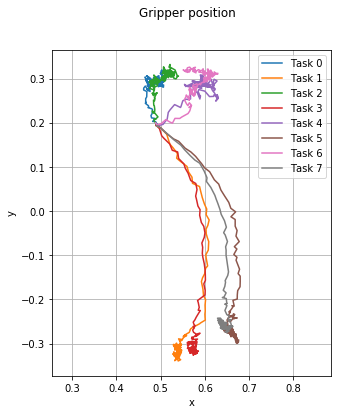

In [63]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

fig = plt.figure(figsize=(5, 6))
fig.suptitle("Gripper position")
plt.grid()
plt.axis("equal")

X_AXIS = 0
Y_AXIS = 1

axes = "xyz"

gripper_pos = np.array(samples[0]["obses"])[:,-3:]
for step in range(0, len(gripper_pos), PATH_LEN):
    plt.plot(gripper_pos[step:(step+PATH_LEN), X_AXIS], gripper_pos[step:(step+PATH_LEN), Y_AXIS],
             label="Task %s" % samples[0]["tasks"][step][-1])

plt.xlabel(axes[X_AXIS])
plt.ylabel(axes[Y_AXIS])
plt.legend()
# fig.tight_layout()
# fig.savefig("real_2d_reacher_embed.pdf")

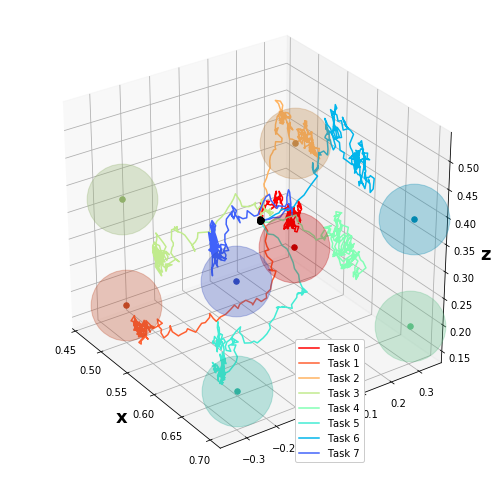

In [93]:
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(7, 7))
# fig.suptitle(title)
ax = fig.add_subplot(111, projection='3d')
ax.grid()

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for step in range(0, len(gripper_pos), PATH_LEN):
    task = int(samples[0]["tasks"][step][-1])
    xs, ys, zs = gripper_pos[step:(step+PATH_LEN),0], gripper_pos[step:(step+PATH_LEN),1], gripper_pos[step:(step+PATH_LEN),2]

#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
    ax.plot(xs, ys, zs, color=colormap(task * 1. / 8), zorder=2,
            label="Task %i" % task, alpha=1.)
    ax.scatter([xs[0]], [ys[0]], [zs[0]], s=30, color="black", zorder=3)
    true_color = np.array(colormap(task * 1. / 8)) * 0.75
    true_color[3] = 1.
    ax.scatter([TASK_GOALS[task][0]], [TASK_GOALS[task][1]], [TASK_GOALS[task][2]], s=5000, color=true_color, alpha=0.3, zorder=2)
    ax.scatter([TASK_GOALS[task][0]], [TASK_GOALS[task][1]], [TASK_GOALS[task][2]], s=30, color=true_color, zorder=3)

ax.view_init(elev=30, azim=-35)
ax.set_xlabel('x', fontsize=18, fontweight='bold')
ax.set_ylabel('y', fontsize=18, fontweight='bold')
ax.set_zlabel('z', fontsize=18, fontweight='bold')

# ... some plotting
legend = ax.legend(bbox_to_anchor=(.75, .3))
for lh in legend.legendHandles: 
    lh.set_alpha(1)
legend.get_frame().set_alpha(1)

fig.tight_layout()
fig.savefig("real_gripper_pos.png", dpi=600)
fig.savefig("real_gripper_pos.pdf", dpi=600)

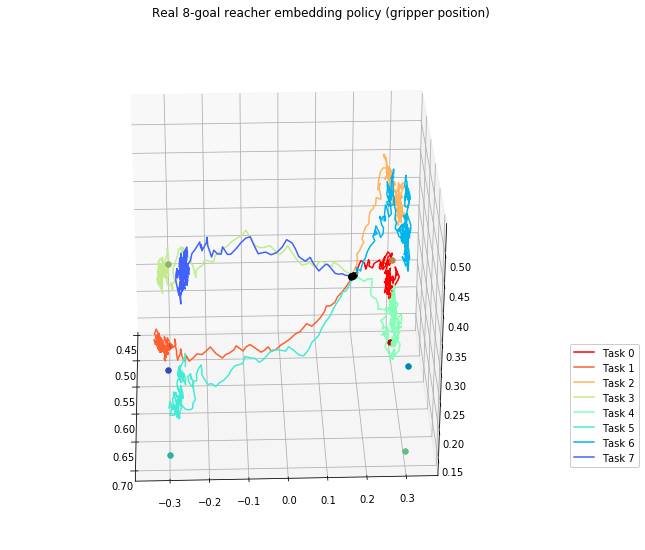

In [7]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.animation as animation


fig = plt.figure(figsize=(8 + 1, 8))
fig.suptitle("Real 8-goal reacher embedding policy (gripper position)")
ax = fig.add_subplot(111, projection='3d')
ax.grid()

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for step in range(0, len(gripper_pos), PATH_LEN):
    task = int(samples[0]["tasks"][step][-1])
    xs, ys, zs = gripper_pos[step:(step+PATH_LEN),0], gripper_pos[step:(step+PATH_LEN),1], gripper_pos[step:(step+PATH_LEN),2]

#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
    ax.plot(xs, ys, zs, color=colormap(task * 1. / 8), zorder=2,
            label="Task %i" % task, alpha=1.)
    ax.scatter([xs[0]], [ys[0]], [zs[0]], s=30, color="black", zorder=3)
    true_color = np.array(colormap(task * 1. / 8)) * 0.75
    true_color[3] = 1.
    ax.scatter([TASK_GOALS[task][0]], [TASK_GOALS[task][1]], [TASK_GOALS[task][2]], s=30, color=true_color, zorder=3)

legend = plt.legend(bbox_to_anchor=(1.2, .4))
for lh in legend.legendHandles: 
    lh.set_alpha(1)
legend.get_frame().set_alpha(1)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

def update(num, *_args):
    ax.view_init(elev=30, azim=num*2)
    return _args
ani = animation.FuncAnimation(fig, update, 180,
                              interval=50, blit=True)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('real_gripper_pos.mp4', writer=writer)
ani

# Interpolation between tasks

In [58]:
samples = np.load("../figs/real_data/reacher_u_rollout_real.npy").flatten()
set(samples[0]["tasks"]), samples[0].keys()

({'task3_4', 'task4_8', 'task8_7'},
 dict_keys(['actions', 'tasks', 'obses', 'latents']))

380
31 unique latents
31 unique latents
31 unique latents


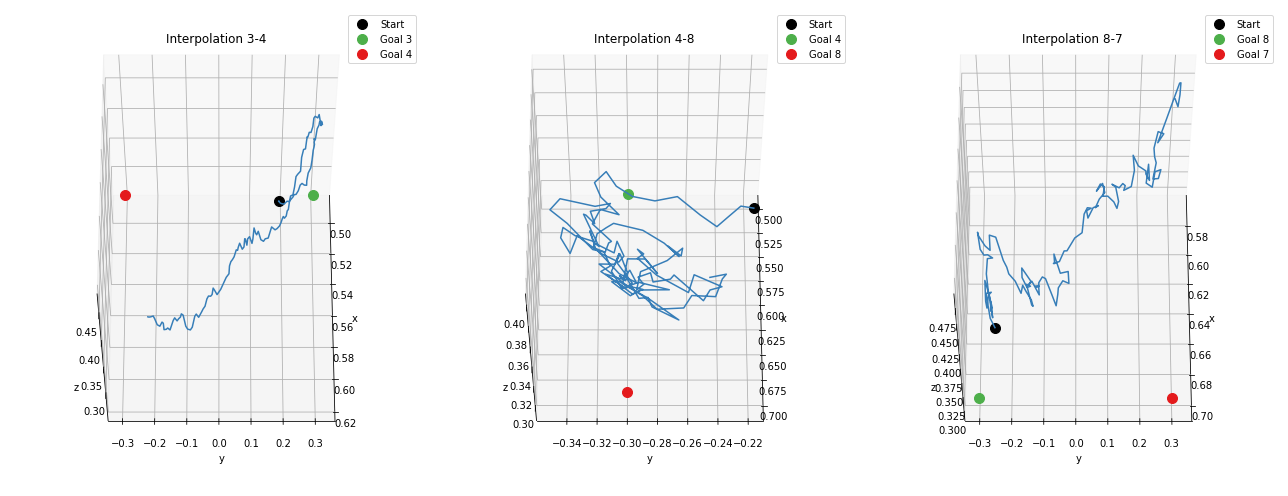

In [88]:
fig = plt.figure(figsize=(18, 7))
# fig.suptitle(title)

gripper_pos = np.array(samples[0]["obses"])[:,-3:]
print(len(gripper_pos))
colormap = lambda x: matplotlib.cm.get_cmap("Set1")(1. - x)
traj_indices = []
start = 0
for i, task in enumerate(samples[0]["tasks"]):
    if task != samples[0]["tasks"][start]:
        traj_indices.append((start, i))
        start = i
traj_indices.append((start, len(samples[0]["tasks"])))

for pn, (start, end) in enumerate(traj_indices):
    ax = fig.add_subplot("1%i%i" % (len(traj_indices), pn+1), projection='3d')
    ax.grid()

    # PATH_LEN = 150            
    task_a = int(samples[0]["tasks"][start][-3])-1
    task_b = int(samples[0]["tasks"][start][-1])-1
    pos_seq = gripper_pos[start:end,:]
    lat_seq = samples[0]["latents"]
    unique_latents = list(set(map(str, lat_seq)))
    print("%i unique latents" % len(unique_latents))
    xs, ys, zs = gripper_pos[start:end,0], gripper_pos[start:end,1], gripper_pos[start:end,2]

#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
    ax.plot(xs, ys, zs, color=colormap(.8), zorder=2, alpha=1.)
    ax.set_title("Interpolation %i-%i" % (task_a+1, task_b+1))
    ax.scatter([xs[0]], [ys[0]], [zs[0]], s=100, color="black", zorder=3, label="Start")
    true_color = np.array(colormap(task_a * 1.)) * 0.5
    true_color[3] = 1.
    ax.scatter([TASK_GOALS[task_a][0]], [TASK_GOALS[task_a][1]], [TASK_GOALS[task_a][2]], s=100, color=colormap(0.7), label="Goal %i" % (task_a+1), zorder=3)
    ax.scatter([TASK_GOALS[task_b][0]], [TASK_GOALS[task_b][1]], [TASK_GOALS[task_b][2]], s=100, color=colormap(0.9), label="Goal %i" % (task_b+1), zorder=3)
#     break
    
    ax.view_init(elev=60, azim=0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()
# legend = plt.legend(bbox_to_anchor=(.8, .3))
# for lh in legend.legendHandles: 
#     lh.set_alpha(1)
# legend.get_frame().set_alpha(1)
fig.tight_layout()

380
31 unique latents
31 unique latents
31 unique latents


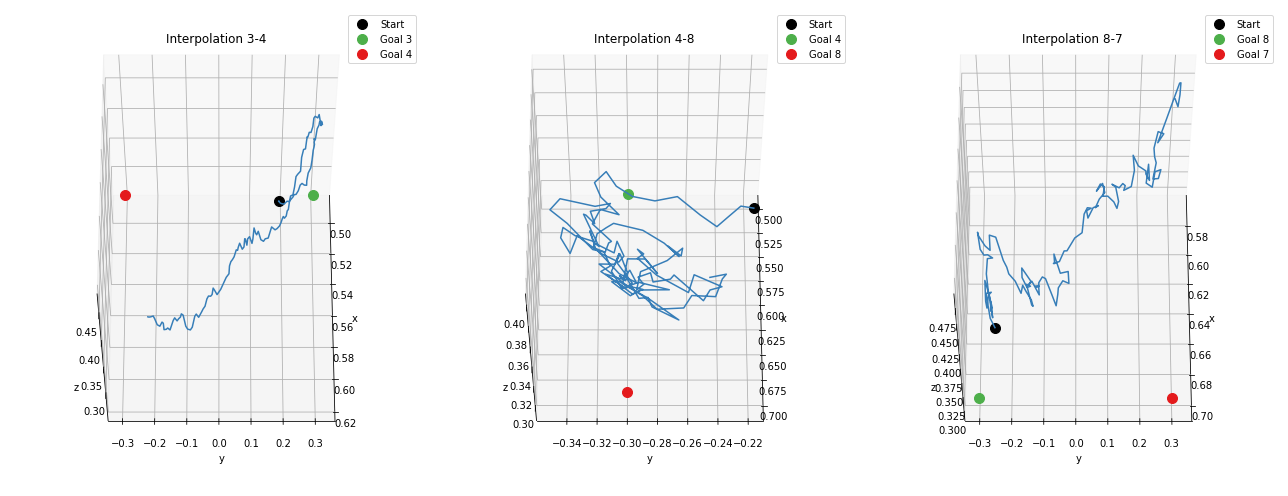

In [89]:
fig = plt.figure(figsize=(18, 7))
# fig.suptitle(title)

gripper_pos = np.array(samples[0]["obses"])[:,-3:]
print(len(gripper_pos))
colormap = lambda x: matplotlib.cm.get_cmap("Set1")(1. - x)
traj_indices = []
start = 0
for i, task in enumerate(samples[0]["tasks"]):
    if task != samples[0]["tasks"][start]:
        traj_indices.append((start, i))
        start = i
traj_indices.append((start, len(samples[0]["tasks"])))

for pn, (start, end) in enumerate(traj_indices):
    ax = fig.add_subplot("1%i%i" % (len(traj_indices), pn+1), projection='3d')
    ax.grid()

    # PATH_LEN = 150            
    task_a = int(samples[0]["tasks"][start][-3])-1
    task_b = int(samples[0]["tasks"][start][-1])-1
    pos_seq = gripper_pos[start:end,:]
    lat_seq = samples[0]["latents"]
    unique_latents = list(set(map(str, lat_seq)))
    print("%i unique latents" % len(unique_latents))
    xs, ys, zs = gripper_pos[start:end,0], gripper_pos[start:end,1], gripper_pos[start:end,2]

#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
    ax.plot(xs, ys, zs, color=colormap(.8), zorder=2, alpha=1.)
    ax.set_title("Interpolation %i-%i" % (task_a+1, task_b+1))
    ax.scatter([xs[0]], [ys[0]], [zs[0]], s=100, color="black", zorder=3, label="Start")
    true_color = np.array(colormap(task_a * 1.)) * 0.5
    true_color[3] = 1.
    ax.scatter([TASK_GOALS[task_a][0]], [TASK_GOALS[task_a][1]], [TASK_GOALS[task_a][2]], s=100, color=colormap(0.7), label="Goal %i" % (task_a+1), zorder=3)
    ax.scatter([TASK_GOALS[task_b][0]], [TASK_GOALS[task_b][1]], [TASK_GOALS[task_b][2]], s=100, color=colormap(0.9), label="Goal %i" % (task_b+1), zorder=3)
#     break
    
    ax.view_init(elev=60, azim=0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()
# legend = plt.legend(bbox_to_anchor=(.8, .3))
# for lh in legend.legendHandles: 
#     lh.set_alpha(1)
# legend.get_frame().set_alpha(1)
fig.tight_layout()

dict_keys(['actions', 'observations'])
Start pos: [0.49021236 0.19193864 0.26490791]
End pos: [0.49829968 0.04977408 0.15752753]
Distance: 0.050368782689763296


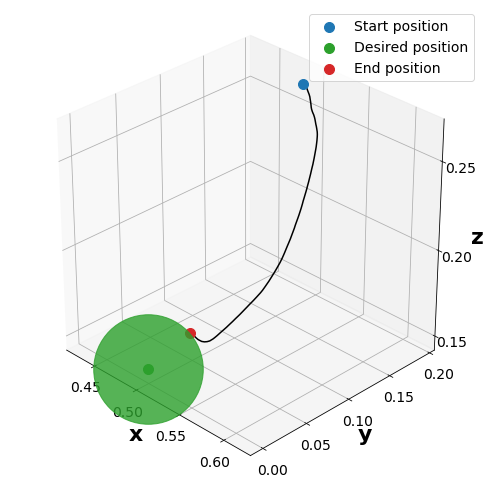

In [58]:
samples = np.load("../figs/real_data/unseen/playback_composer_0.5_0_0.15.npy").flatten()
print(samples[0].keys())

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from mpl_toolkits import mplot3d

matplotlib.rcParams.update({'font.size': 14})

X_AXIS = 0
Y_AXIS = 1

axes = "xyz"
DESIRED_GOAL = np.array([0.5, 0., 0.15])

gripper_pos = np.array(samples[0]["observations"])[:,-3:]
print("Start pos:", gripper_pos[0,:])
print("End pos:", gripper_pos[-1,:])
print("Distance:", np.linalg.norm(gripper_pos[-1,:] - DESIRED_GOAL))


fig = plt.figure(figsize=(7, 7))
# fig.suptitle(title)
ax = fig.add_subplot(111, projection='3d')
ax.grid()

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for step in range(0, len(gripper_pos), PATH_LEN):
    xs, ys, zs = gripper_pos[step:(step+PATH_LEN),0], gripper_pos[step:(step+PATH_LEN),1], gripper_pos[step:(step+PATH_LEN),2]

    ax.plot(xs, ys, zs, zorder=-2, alpha=1., color='#000000')

ax.scatter([gripper_pos[0,0]], [gripper_pos[0,1]], [gripper_pos[0,2]], label="Start position", s=100, zorder=3)
ax.scatter([DESIRED_GOAL[0]], [DESIRED_GOAL[1]], [DESIRED_GOAL[2]], label="", color='C2', alpha=0.8, s=12000, zorder=3)
ax.scatter([DESIRED_GOAL[0]], [DESIRED_GOAL[1]], [DESIRED_GOAL[2]], label="Desired position", color='C2', s=100, zorder=3)
ax.scatter([gripper_pos[-1,0]], [gripper_pos[-1,1]], [gripper_pos[-1,2]], label="End position", color='C3', s=100, zorder=4)

ax.view_init(elev=30, azim=-45)
ax.set_xlabel('x', fontsize=22, fontweight='bold')
ax.set_ylabel('y', fontsize=22, fontweight='bold')
ax.set_zlabel('z', fontsize=22, fontweight='bold')
ax.set_xlim([0.42, 0.625])


plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='z', nbins=4)

# ax.axis("equal")
ax.legend()
fig.tight_layout()
# fig.savefig("real_gripper_pos.png", dpi=600)
fig.savefig("compose_ddpg_05_0_015.pdf")